In [6]:
import numpy as np

mean = np.load("parameters/pixel_mean.npy")
print(mean)
var = np.load("parameters/pixel_var.npy")
print(var)
priors = np.load("parameters/pixel_theta.npy")
print(priors)

[[0.75250609 0.34808562 0.34891229]
 [0.35060917 0.73551489 0.32949353]
 [0.34735903 0.33111351 0.73526495]]
[[0.03705927 0.06196869 0.06202255]
 [0.05573463 0.03478593 0.05602188]
 [0.05453762 0.05683331 0.03574061]]
[0.36599892 0.3245804  0.30942068]


In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import os, cv2

def read_pixels(folder, verbose = False):
    '''
    Reads 3-D pixel value of the top left corner of each image in folder
    and returns an n x 3 matrix X containing the pixel values 
    '''  
    n = len(next(os.walk(folder))[2]) # number of files
    X = np.empty([n, 3])
    i = 0

    if verbose:
        fig, ax = plt.subplots()
        h = ax.imshow(np.random.randint(255, size=(28,28,3)).astype('uint8'))

    for filename in os.listdir(folder):  
        # read image
        # img = plt.imread(os.path.join(folder,filename), 0)
        img = cv2.imread(os.path.join(folder,filename))
        # convert from BGR (opencv convention) to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # store pixel rgb value
        X[i] = img[0,0].astype(np.float64)/255
        i += 1

        # display
        if verbose:
            h.set_data(img)
            ax.set_title(filename)
            fig.canvas.flush_events()
            plt.show()

    return X

In [2]:
folder = 'data/training'
X1 = read_pixels(folder+'/red', verbose = False)
X2 = read_pixels(folder+'/green')
X3 = read_pixels(folder+'/blue')
y1, y2, y3 = np.full(X1.shape[0],1), np.full(X2.shape[0], 2), np.full(X3.shape[0],3)


In [3]:
X, y = np.concatenate((X1,X2,X3)), np.concatenate((y1,y2,y3))

print(y.shape)
print(X.shape)

(3694,)
(3694, 3)


In [4]:
from pixel_classifier import PixelClassifier

In [5]:
myPixelClassifier = PixelClassifier()
weigths = myPixelClassifier.train(X, y)
print(myPixelClassifier.accuracy(X, y))

Learning Gaussian parameters.....
0.3360101354015306


In [6]:
from pixel_classifier import PixelClassifier
folder = 'data/validation/blue'
myPixelClassifier = PixelClassifier()
X = read_pixels(folder)
y = myPixelClassifier.classify(X)

In [7]:
y.reshape(1, -1)

array([[3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3.]])

In [8]:
y = np.array(y)
print('Precision: %f' % (sum(y==1)/y.shape[0]))
print('Precision: %f' % (sum(y==2)/y.shape[0]))
print('Precision: %f' % (sum(y==3)/y.shape[0]))

Precision: 0.024096
Precision: 0.000000
Precision: 0.975904


In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("0002.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, channels = img.shape
plt.imshow(img)

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
img = img.astype(np.float64)/255

In [13]:
img = np.reshape(img,(rows*cols,channels))

In [14]:
y = myPixelClassifier.classify(img)

In [17]:
segmentation = np.copy(y)
seg = np.where(segmentation==3, 1, 0)
seg = seg.reshape(rows, cols)

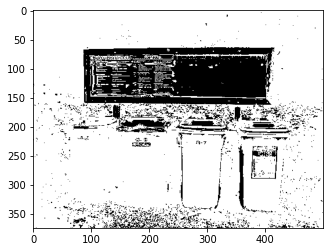

In [19]:
plt.imshow(seg, cmap='gray')

In [1]:
from pixel_classifier import MultiClassLogistricRegression

In [7]:
multilogistic = MultiClassLogistricRegression(300, 1e-3)
weigths = multilogistic.train(X, y)

AttributeError: 'MultiClassLogistricRegression' object has no attribute 'class_labels'